### CS484/684 Computational Vision

# Homework Assignment 0

This assignment is a refresher on calculus and linear algebra including exercises on image gradients, point processing, and harris corners. It also introduces you to jupiter notebook enviroment and python. Notebook environment allows you to combine cells with python code and cells with text (markdown cells). Text cells can include "latex" mathematical formulas. Such formulas can be written in the inline mode, for example, $(x+y)^2=x^2+2xy+y^2$. Important or longer formulas may look better in a show mode, e.g. $$1=\sum_{n=1}^{\infty}\left(\frac{1}{2}\right)^n.$$ 
Latex is commonly used for scientific writing and you should use it for the written parts of your assignments. You should use text cells (markdown cells) to answer written questions or to present your explanations/comments in notebook reports with code. A list of common mathematical symbols in latex can be easily found online (e.g. https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols). You can also find many online resources explaining latex for matematical equations, e.g. https://en.wikibooks.org/wiki/LaTeX/Advanced_Mathematics.


# Problem 1

##### Define domain transformation functions $t_x(x,y)$ and $t_y(x,y)$ that rotate (either clock- or counter-clock-wise) the image by angle $\theta$ with respect to the central point of the image $(x_c,y_c)$.

Solution: (show your work in this "Markdown" cell using basic text and latex for formulas, make sure you "run" this and other text or code cells before saving your notebook for submission so that it is easy to read and evaluate your writings and results). You can add empty lines to create new paragraphs in text (markdown) cells, as here...

My solution is $$\begin{eqnarray} t_x(x,y)&=& (x-x_c)\cos(\theta) - (y-y_c)\sin(\theta) + x_c \\
                                  t_y(x,y)&=& (x-x_c)\sin(\theta) + (y-y_c)\cos(\theta) + y_c     \end{eqnarray}$$

Use only plain text (no boldface or ### heading) in your solutions so that it is easier to distinguish your work from the provided problem statements. However, if necessary, you can insert additional cells, if that helps the structure your solution. 

Do not change the order of the problems. Once you completed all written and code cells, run $$\text{Kernel->Restart & Run All}$$ to generate a final "gradable" version of your notebook and save your ipynb file. Also use $$\text{File->Print Preview}$$ and then print your report from your browser into a pdf file. Submit both .pdf and .ipynb files.

# Problem 2

##### (a) Find all points $(x,y)$ with local minimum for function $f(x) = x^2 - 2x$.

Solution: $$\begin{eqnarray} \frac{df(x)}{dx} &=& 2x - 2 \\ 0 &=& 2x - 2 \\ x &=& 1 \end{eqnarray}$$  
thus f(1) = -1, the point is (1,-1)

##### (b) Consider the following function of two variables $f(x,y) = x^2 - xy^2$ and find all points with zero gradient $\nabla f = 0$. HINT: you need to find all solutions to a system of two equations $$\left\{\begin{align} \frac{\partial f}{\partial x} & =  0 \\  \frac{\partial f}{\partial y}  & = 0  \end{align}  \right.$$

Solution: (write your solution in this cell)

 $$\left\{\begin{align} 2x - y^2 & =  0 \\  2xy  & = 0  \end{align}  \right.$$  
 $$\left\{\begin{align} x &=  0 \\  y  & = 0  \end{align}  \right.$$  
   
thus points with zero gradient $\nabla f = 0$ is (0,0)

##### (c) Use "matplotlib" to display a 3D plot for function f(x,y) in the range $-1<x<3, -1<y<5 $. Write your code in the cell below. Make sure you "run" the cell with your code below before saving and submitting your notebook. This will make your plot (the output of your code) visible when the notebook is opened for grading.

<IPython.core.display.Javascript object>


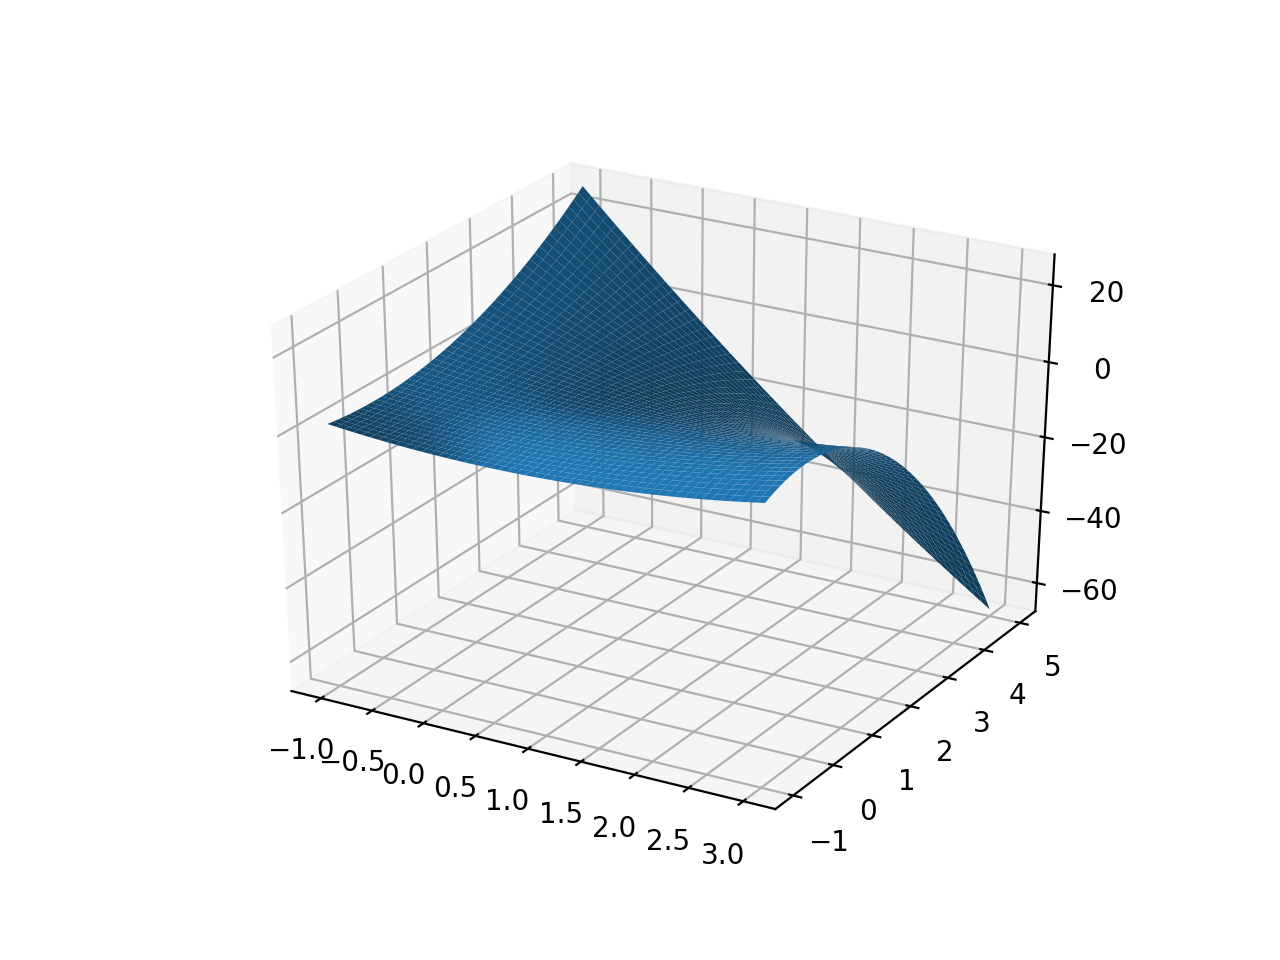

In [7]:
# Solution: write your code in this cell
%matplotlib notebook
                     # unlike "inline", "notebook" allows interactive 3D plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X = np.linspace(-1, 3, 500)
Y = np.linspace(-1, 5, 500)
X_grid, Y_grid = np.meshgrid(X,Y)
Z_grid = X_grid**2 - X * Y_grid**2

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid)
plt.show()

# Problem 3

##### Prove that median filtering in not a linear transormation of the image. HINT: find a counter example showing that for some images $A$ and $B$, $$Med(A + B)\neq Med(A) + Med(B).$$ For simplicity, you can use 1D images (scan lines) and median filtering over window of size 3.

Solution: (write your solution in this cell)
  
A = [1, 2, 3]  
B = [70, 100, 70]  
  
with extension:  
Med(A) = [1, 2, 3]  
Med(B) = [70, 70, 70]  
Med(A+B) = [71, 73, 73]  
Med(A) + Med(B) = [71, 72, 73]  
Clearly, we can see the 2nd element, 72 $\neq$ 73  
and therefore, median filter is not a linear transformation

# Problem 4

##### (a) Use the following cell to write python code that loads an arbitrary RGB image and computes its greyscale version. The function's input should be an RGB image. The computed greyscale image should be a 2D array of the same size as the input image. You should write your own code explicitly computing the corresponding greyscale values at each pixel without using any standard functions/libraries for converting colored images to greyscale images. Treat greyscale value is an average of the corresponding R G and B values. Your code should display both the input RGB image and the computed image/matrix of greyscale values.

(768, 1024, 3)


<IPython.core.display.Javascript object>


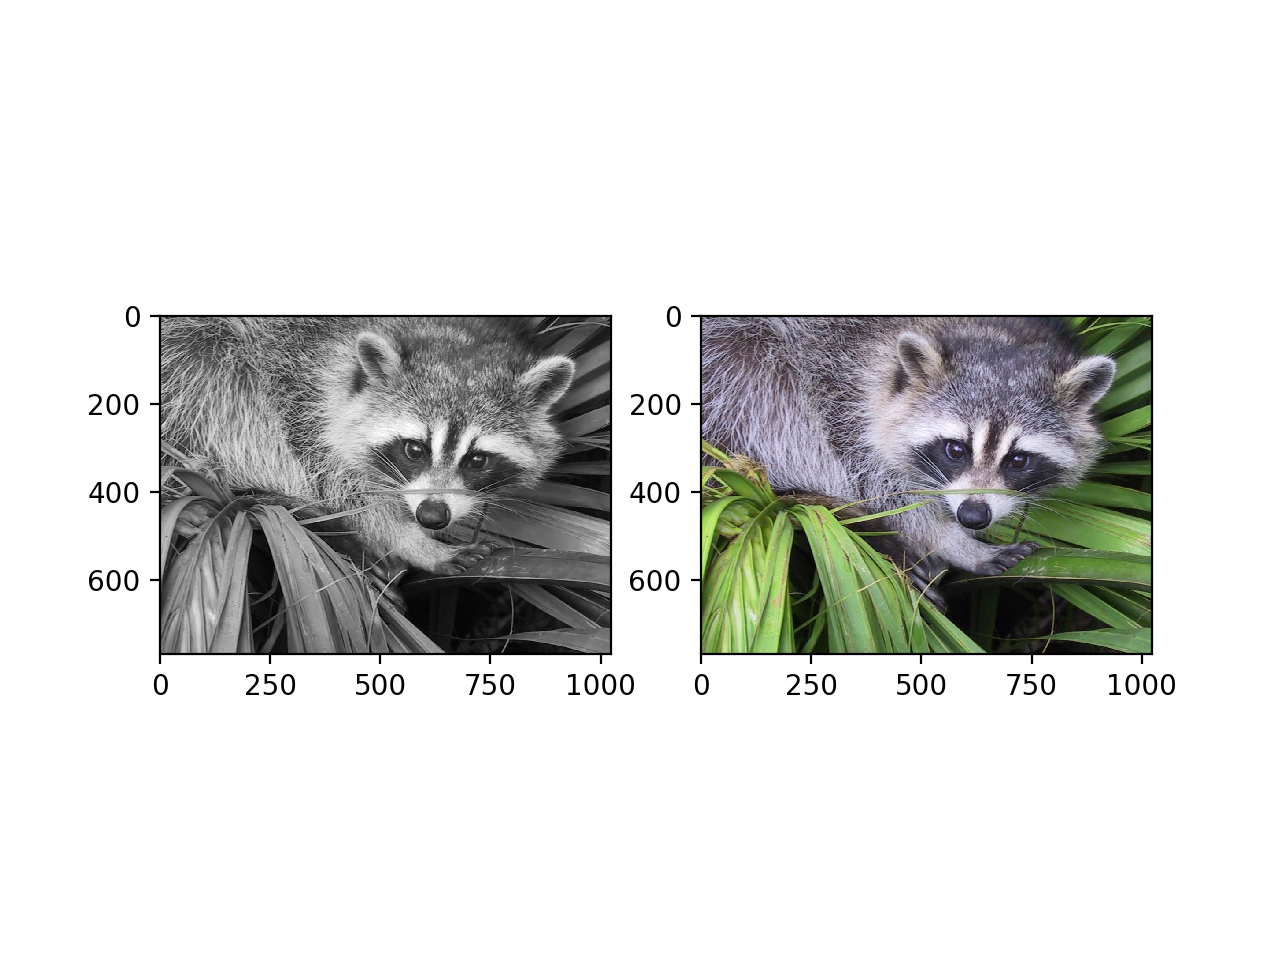

In [8]:
# Solution: write your code in this cell

def greyscale(image):
    grey = np.zeros((image.shape[0], image.shape[1], 3))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grey[i,j,0] = (image[i,j,0]/3 + image[i,j,1]/3 + image[i,j,2]/3)
    
    plt.subplot(1,2,1)
    plt.imshow(grey[:,:,0], cmap='gray')
    
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.show()
    return grey

# Testing     
from scipy import misc
im = misc.face()
print im.shape

im_grey = greyscale(im)

##### (b) Write code that randomly shuffles all image pixels using function numpy.random.shuffle.

<IPython.core.display.Javascript object>


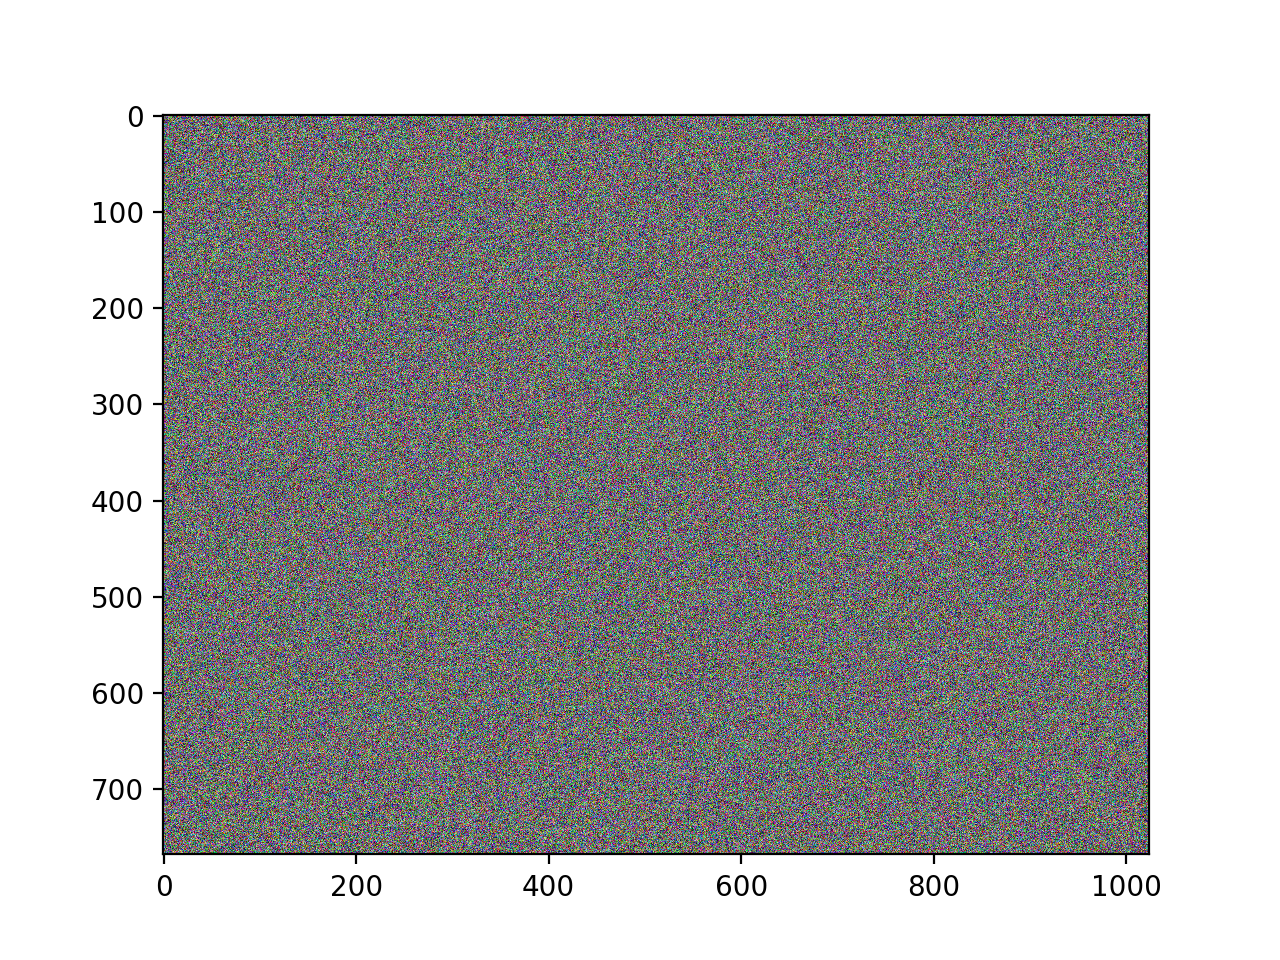

In [9]:
# Solution: write your code in this cell. Show one image and a result of shuffling.

from numpy.random import shuffle

def shuffle_pixels(image):
    sh = np.array(image).copy()
    sh = sh.reshape(image.shape[0]*image.shape[1]*image.shape[2])
    shuffle(sh)
    sh = sh.reshape(image.shape)
    
    plt.imshow(sh)
    plt.show()
    
shuffle_pixels(im)

# Problem 5

##### (a) Image differentiation: Write code that estimates partial derivatives $d(x,y):=\frac{\partial}{\partial x} f(x,y)$ of a greyscale image $f(x,y)$ with respect to variable $x$ using forward difference approximation $$\frac{\partial}{\partial x} f(x,y)\approx \frac{f(x+\Delta,y)-f(x,y)}{\Delta}$$ where $\Delta$ is the distance between pixels. However, instead of writing code using explicit convolution with the corresponding kernel (as in "convolution.ipynb"), compute an image with pixels shifted to the left (using numpy.roll function) and use linear operations over images as matrices (pointwise addition/subtraction). Hint: while shifting pixels to the left, you can keep the original intensity values in the right most column|

The solution is plot through matplotlib's colormap='gray', but this function will normalize the result, as shown in print stament, the max value is 51, and min value is 0. 

<IPython.core.display.Javascript object>


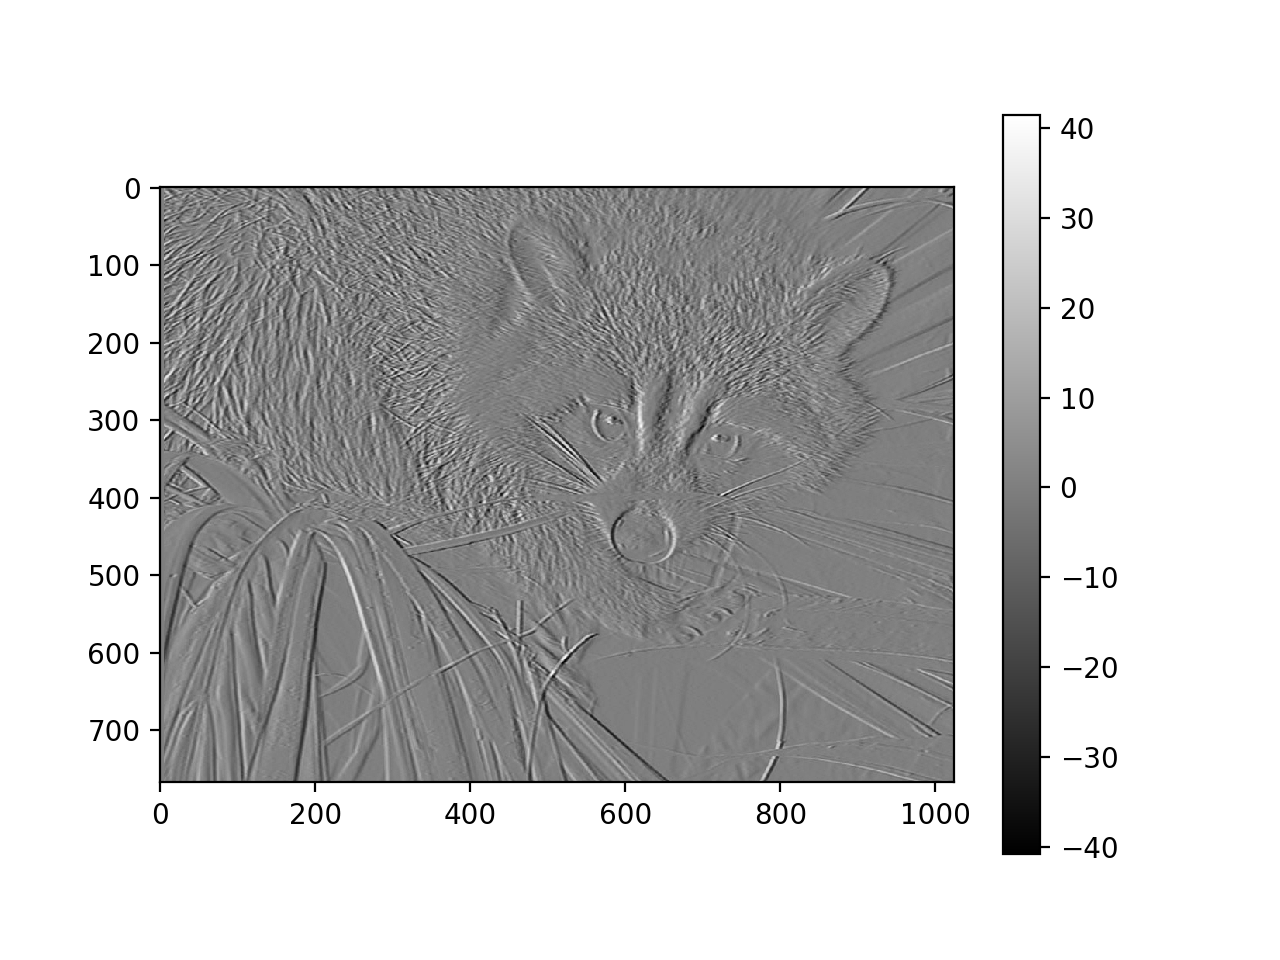

0.0
51.0


In [14]:
# Solution: write your code in this cell

def diff(image, delta):
    temp = np.array(image).copy()
    temp = np.roll(temp, delta, axis=1)
    left_most_col = image[:,:delta]
    temp[:,:delta] = left_most_col
    
    return (image[:,:,0] - temp[:,:,0])*1.0 / delta


plt.imshow(diff(im_grey, 5), cmap='gray')
plt.colorbar()
plt.show()

#print diff(im, 5)
print np.min(diff(im, 5))
print np.max(diff(im, 5))

##### (b) Point processing: find linear range transofrmation function $t(d)$ that convert partial derivatives $d$ computed above to greyscale values in the range $[0,255]$ so that $t(d_{max})=255$ for the maximum observed value of partial derivative $d_{max}$ and $t(d_{min})=0$ for the minimum derivative $d_{min}$. Compute the transformed greyscale image $g(x,y) = t(d(x,y))$ and display it.

<IPython.core.display.Javascript object>


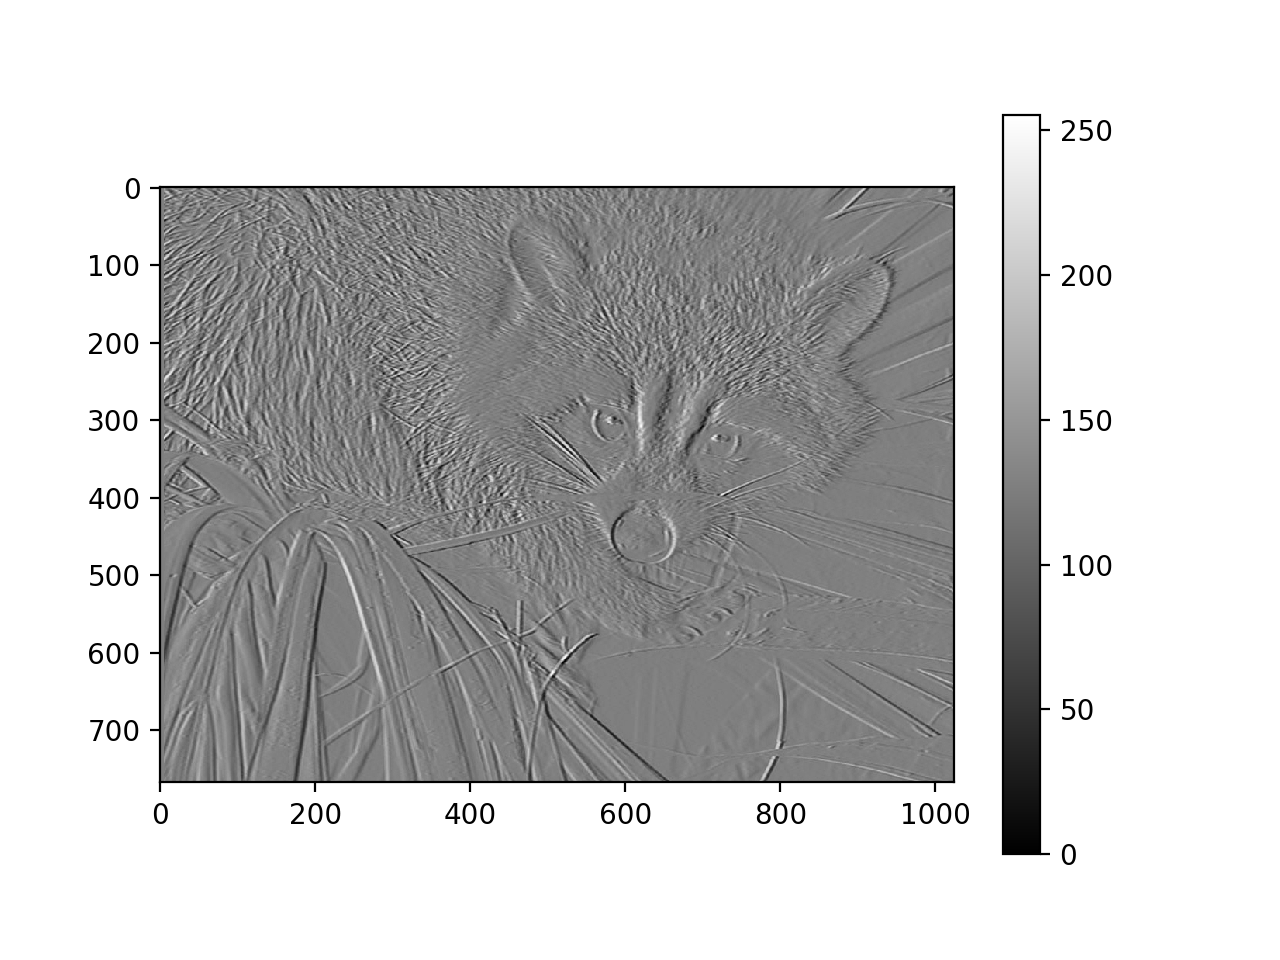

0.0
255.0


In [15]:
# Solution: write your code in this cell
def normalize(image_d):
    min_val = min(image_d.reshape(image_d.shape[0] * image_d.shape[1]))
    max_val = max(image_d.reshape(image_d.shape[0] * image_d.shape[1]))
    return min_val, max_val


def t(pixel, min_val, max_val):
    return (pixel - min_val)*1.0 / (max_val - min_val) * 255
    

def point_proc(image_d):
    min_val, max_val = normalize(image_d)
    g = t(image_d, min_val, max_val)
    
    plt.imshow(g, cmap='gray')
    
    return g
    

g = point_proc(diff(im_grey, 5))
plt.colorbar()
plt.show()

#print g
print np.min(g)
print np.max(g)

##### (c) Use your code to compare partial derivatives for the same image with different amount of additive Gaussian noise (you can use code for generating noise from Filtering.ipynb).

<IPython.core.display.Javascript object>


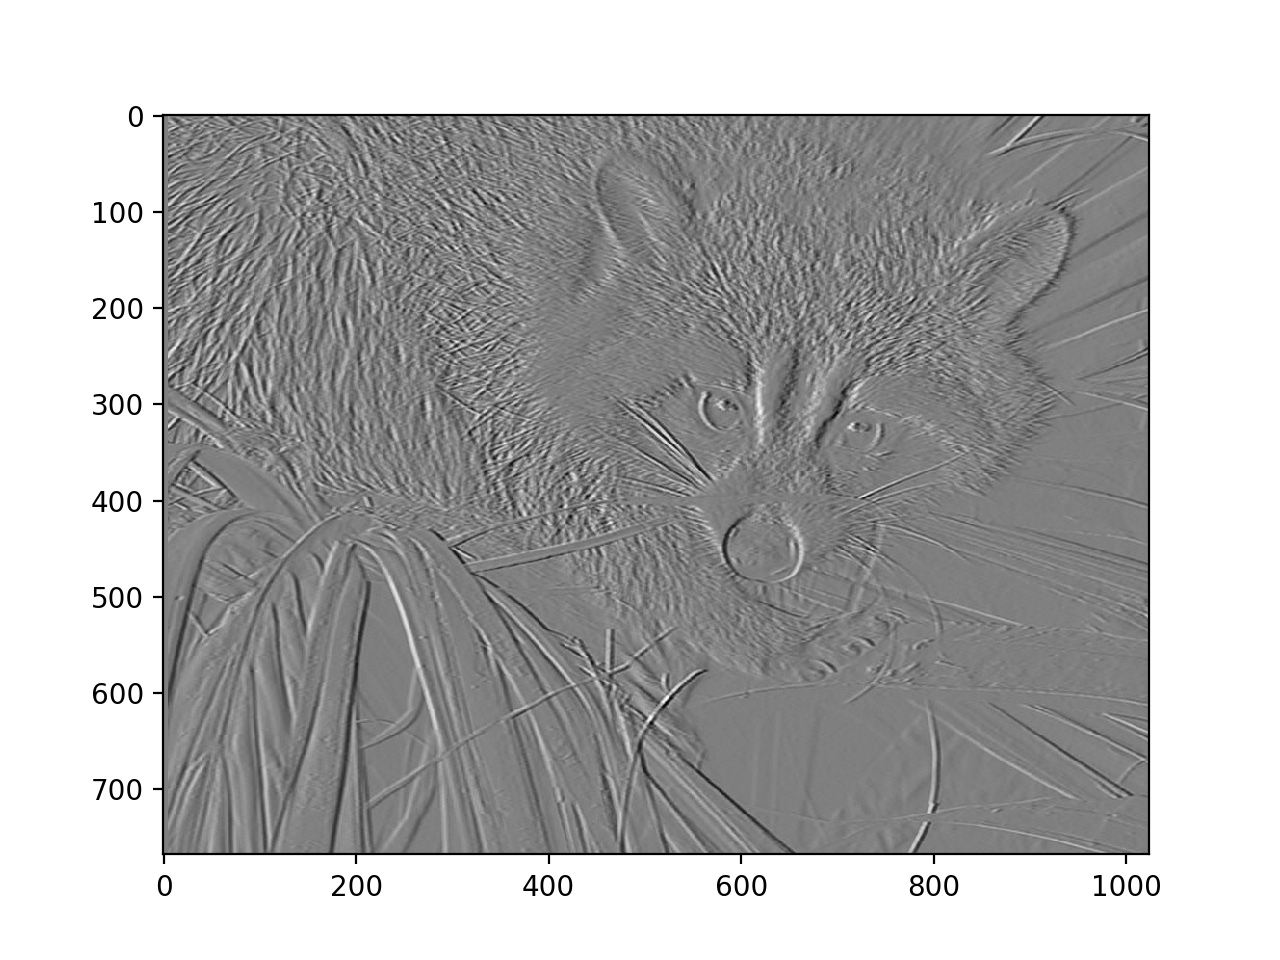

<IPython.core.display.Javascript object>


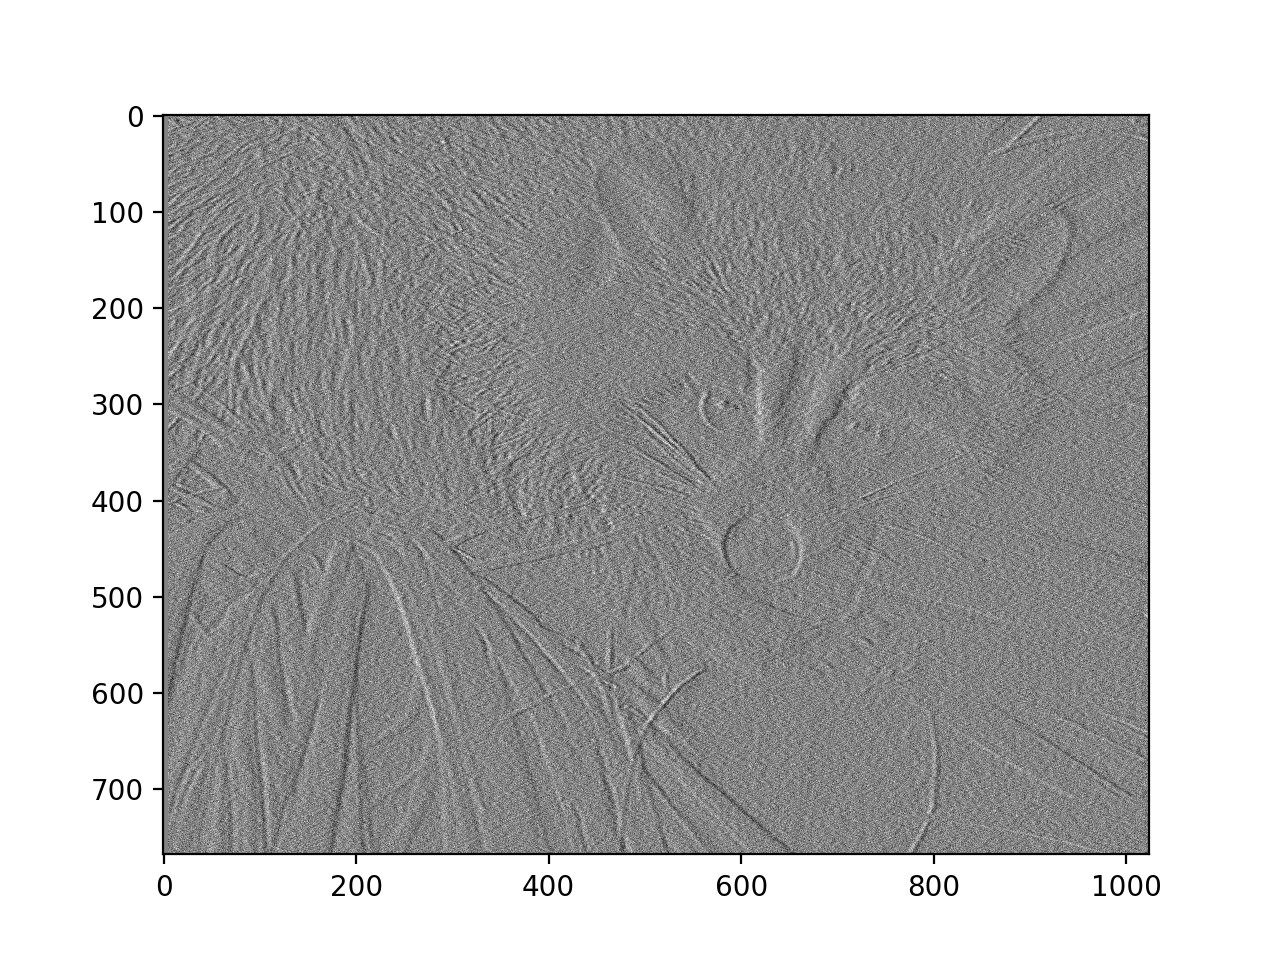

In [12]:
# Solution: write your code in this cell

# generating image with gaussian noise
sigma = 50.0
gauss = np.random.normal(0.0,sigma,(im.shape[0],im.shape[1]))  # Gaussian noise array of given shape
gauss_im = im_grey[:,:,0] + gauss         # additive Gaussian/Normal noise

# plt.imshow(gauss_im, cmap='gray')
# plt.show()

plt.figure()
plt.imshow(diff(im_grey,5), cmap='gray')

plt.figure()
plt.imshow(diff(gauss_im[:,:,None], 5), cmap='gray')

# Problem 6 (linear algebra refresher)

##### (a) In this problem we use $\nabla I (x,y)$ to denote a gradient of image inensities at point $(x,y)$ only to emphasize this dependence of the gradient on location. Assume that $\nabla I (x,y)$  is a non-zero vector at a given point $(x,y)$. What is the rank of matrix $\nabla I(x,y) \cdot \nabla I^T(x,y)$ and why?

Solution: (simple argument from linear algebra)

Rank 1.  
Since $\nabla I(x,y)$ is a vector with shape $2 \times 1$ (one for dx and one for dy), $\nabla I(x,y) \cdot \nabla I^T(x,y)$ will give us a matrix M with i-th row being $\nabla I^T(x,y)_i \cdot (\nabla I(x,y))$.   
Notice $\nabla I^T(x,y)_i$ is a scalar, so matrix M is stack by the multiple of $\nabla I(x,y)$, hence each row is linear combination of vector $\nabla I(x,y)$, and by definition, it has rank 1.

##### (b) Assume that an image patch (window $w$) contains a straight intensity edge (as windows on slide 88, topic 3). What should be the rank of Harris matrix  at that patch/window $M_w = \sum_{(x,y)\in w} \nabla I(x,y) \cdot \nabla I^T(x,y)$ and why? 

NOTE: here we assume that $w$ stands for a subset of pixels in the window, rather than 0-1 indicator function for this window (as in the lecture notes). Both types of notation is common. While 0-1 indicators $w(x,y)$ easily extend to weighted support functions, we do not need this generality for this excercise and preferred a slightly simpler set notation.

Solution:  
Rank 1.  
Since there is a straight edges, for each $(x,y)$ in this window, there will be only one direction with same non-zero derivative value, and all other direction will have derivative 0.   
By problem 6 a) we know that $\nabla I(x,y) \cdot \nabla I^T(x,y)$ is a rank 1 matrix. If we sum over all $(x,y) \in w$, since only one direction has value (even the value can be different, but they have a same basis/direction), the composition of multiple same basis matrix still have the same basis.  
Thus, $M_w$ will have rank 1.  


##### (c) What should be the rank of Harris matrix at a patch/window containing a corner at an intersection of two straight edges  (as on slide 89)? Explain.

Solution:  
Rank 2.  
Since now we have at least 2 matrix with different basis, one from the first straight edge and the other from the second straight edge.  
Thus, the composition of these 2 sets of matries will give us a rank 2 Harris matrix